# The sparks Foundation - Data Science & Business Analytics Internship 

## **Data Science - Task 1 : Prediction using Supervised Machine Learning**

In [1]:
#Here we are required to predict the percentage of student based on the number of hours he study 

All Steps

In [2]:
# 1:Importing dataset
# 2: Visualising the dataset\n
# 3 :Data Preparation 
# 4:Training the algorithm 
# 5:Visualizing the model 
# 6 :Making Predictions 
# 7: Evaluation the model

### **1. Importing the dataset**

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
link="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(link)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values so no need to pre-process it

### **2. Visualizing the data**

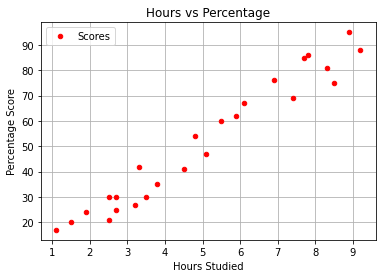

In [12]:
df.plot(x='Hours', y='Scores', style='.', color='red', markersize=9)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.figsize=[20,10]
plt.grid()
plt.show()

We can see a linear relation between "hours" and "percentage".

### **3. Data Preparation**

In [14]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [17]:
x = df.iloc[:,:1].values
y = df.iloc[:,1:].values
print("x=",x)
print("y=",y)

x= [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y= [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


### **3. Training the Algorithm**

In [19]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [20]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

### **5. Visualizing the model**

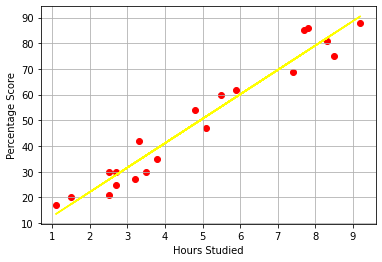

In [27]:
line = model.coef_*x+ model.intercept_

plt.scatter(x_train, y_train, color='red')
plt.plot(x, line, color='yellow');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.figsize=[20,10]
plt.grid()
plt.show()

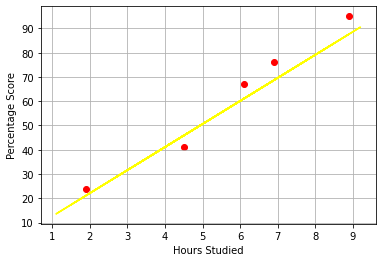

In [26]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x, line, color='yellow');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()


### **6. Making Predictions**

In [28]:
y_pred = model.predict(x_test)

In [29]:
y_test

array([[67],
       [24],
       [41],
       [76],
       [95]])

In [30]:
y_pred

array([[61.07240199],
       [21.18113131],
       [45.87572744],
       [68.67073926],
       [87.66658244]])

In [33]:
# Comparing between actual and predicted data
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })

In [35]:
# Testing with your given data
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if studied for",hours,"hours is",own_pred[0])

The predicted score if studied for 9.25 hours is [90.990855]


### **Therefore we predict that if a student studies for 9.25 hours then he will get a score of 90.99 ~ 91 marks**

### **7. Evaluating the model**

In [36]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.656974488548368


### **Our models error is 5.66 which is acceptable**